In [2]:
import os
import numpy as np
import matplotlib.image as mimg
import matplotlib.pyplot as plt

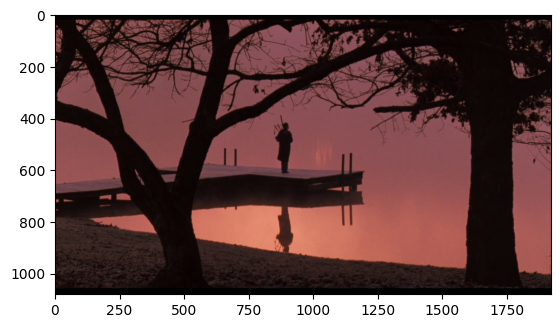

In [3]:
pic_path = "pic/dead_poet_society.png"

img = mimg.imread(pic_path)
plt.imshow(img)

In [4]:
rows = img.shape[0]
cols = img.shape[1]
img.shape

(1080, 1920, 4)

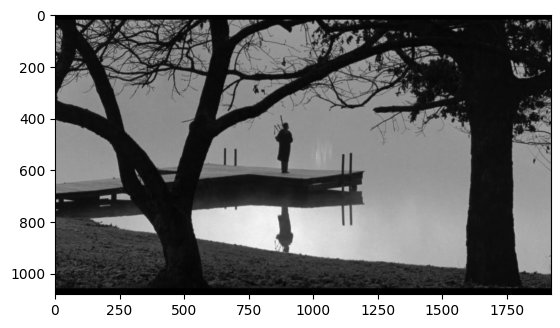

In [5]:
bwimg = 0.299 * img[:, :, 0] + 0.587 * img[:, :, 1] + 0.114 * img[:, :, 2]
plt.imshow(bwimg, cmap='gray')

In [6]:
gauss_filter = 0.25*np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
    ])

vert_det = 0.5*np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

horz_det = 0.5*np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])

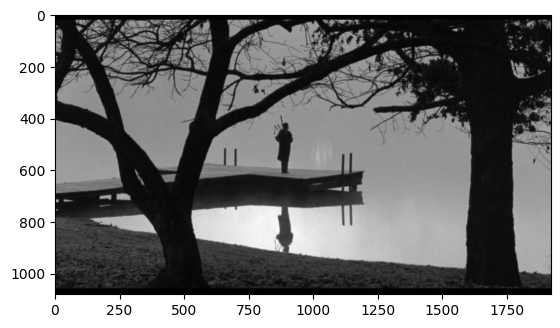

In [7]:
smg = np.zeros(bwimg.shape)

for i in range(1, rows-1):
    for j in range(1, cols-1):
        smg[i][j] = np.sum(gauss_filter*bwimg[i-1:i+2, j-1:j+2])
plt.imshow(smg, cmap='gray')

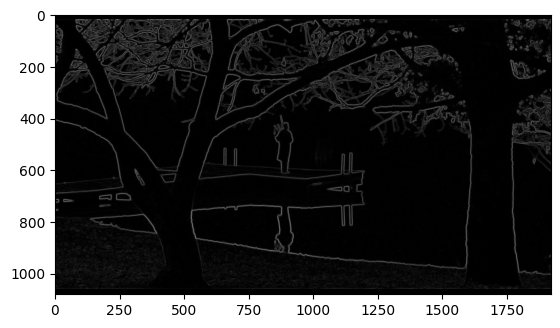

In [8]:
edge = np.zeros(smg.shape)
th = edge.copy()

for i in range(1, rows-1):
    for j in range(1, cols-1):
        tmp = smg[i-1:i+2, j-1:j+2]
        dy = np.sum(vert_det*tmp)
        dx = np.sum(horz_det*tmp)

        edge[i][j] = np.sqrt(dy**2 + dx**2)
        th[i][j] = np.arctan2(dy,dx)

plt.imshow(edge, cmap='gray')

In [9]:
p = np.pi

th[th<0] += p
th = np.rad2deg(th)

k = 180*0.125

th[(th < k) | (th > 7*k)] = 0
th[(k <= th) & (th < 3*k)] = 45
th[(3*k <= th) & (th < 5*k)] = 90
th[(5*k <= th) & (th < 7*k)] = 135

Text(0.5, 1.0, 'edge')

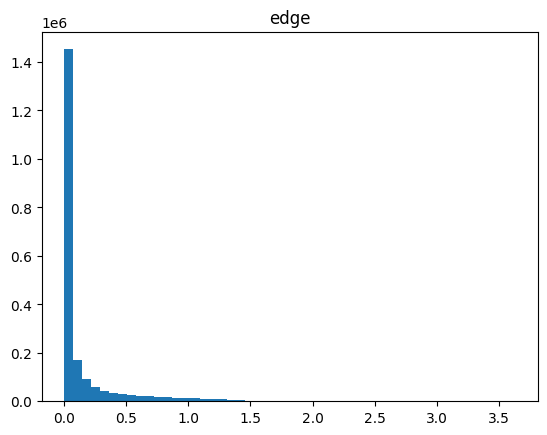

In [10]:
plt.hist(edge.ravel(), bins=50)
plt.title("edge")

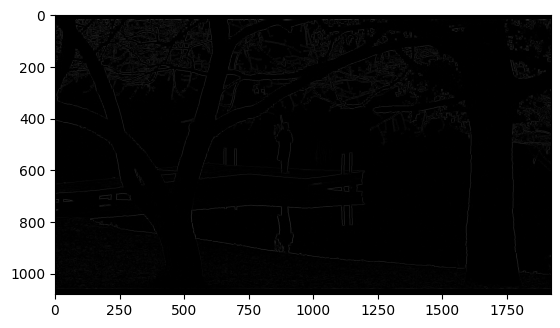

In [11]:
cp = edge.copy()
cpp = cp.copy()

for i in range(1, rows-1):
    for j in range(1, cols-1):
        if th[i][j] == 0:
            if cp[i+1][j] >= cp[i][j] or cp[i-1][j] >= cp[i][j]:
                cpp[i][j] = 0
        elif th[i][j] == 45:
            if cp[i-1][j+1] >= cp[i][j] or cp[i+1][j-1] >= cp[i][j]:
                cpp[i][j] = 0
        elif th[i][j] == 90:
            if cp[i][j+1] >= cp[i][j] or cp[i][j-1] >= cp[i][j]:
                cpp[i][j] = 0
        elif th[i][j] == 135:
            if cp[i+1][j+1] >= cp[i][j] or cp[i-1][j-1] >= cp[i][j]:
                cpp[i][j] = 0
plt.imshow(cpp, cmap='gray')

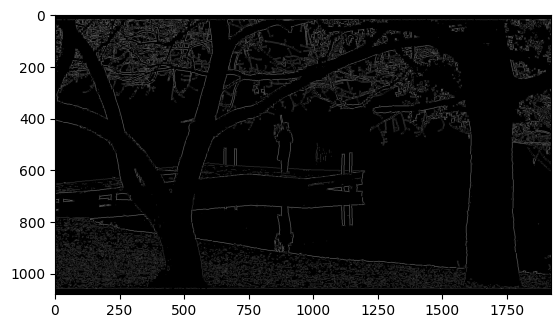

In [12]:
cp = cpp.copy()
strong = 1
weak = 0.5

hp = 98.5
lp = 95

cp[cp>np.percentile(cpp, hp)] = strong
cp[cp<np.percentile(cpp, lp)] = 0
cp[(cp>=np.percentile(cpp, lp)) & (cp<=np.percentile(cpp, hp))] = weak

plt.imshow(cp, cmap="gray")

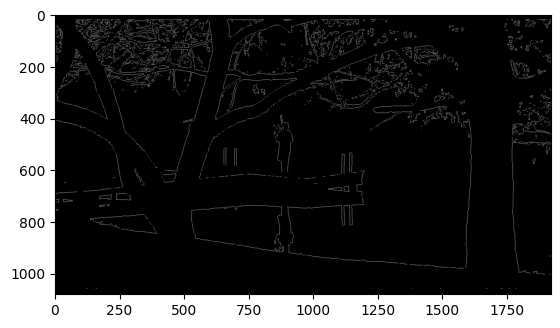

In [13]:
im = cp.copy()

for i in range(1, rows-1):
    for j in range(1, cols-1):
        if im[i][j] == weak:
            if(cp[i-1][j-1] == strong or cp[i-1][j] == strong or cp[i-1][j+1] == strong or cp[i][j-1] == strong or cp[i][j+1] == strong or cp[i+1][j-1] == strong or cp[i+1][j] == strong or cp [i+1][j+1] == strong):
                im[i][j] = 1.
            else:
                im[i][j] = 0.

plt.imshow(im, cmap='gray')

In [14]:
im[im!=1] = 0

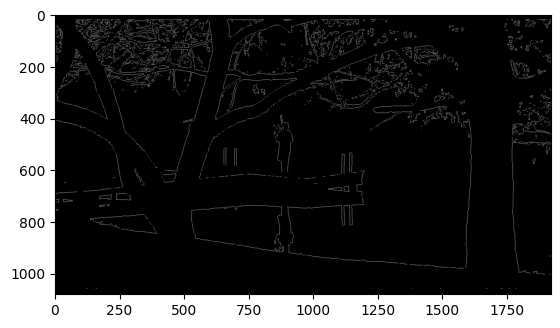

In [15]:
plt.imshow(im, cmap='gray')

In [16]:
np.sum(im)

36106.0

(array([2037494.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,   36106.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

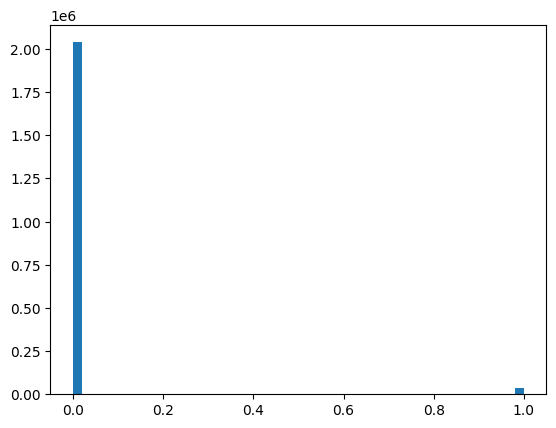

In [19]:
plt.hist(im.ravel(), bins=50)